In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../keras/code/zero_to_deep_learning_udemy/data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


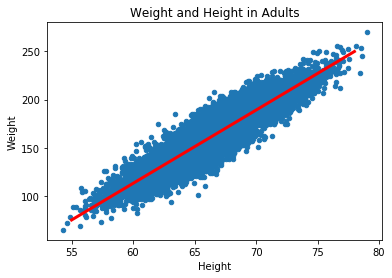

In [4]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in Adults')
plt.plot([55,78],[75,250],color='red',linewidth=3)

In [5]:
#Linear Regression y=mx+b. Here m is weight. So, we can say, y = wx + b or y = w * x + b

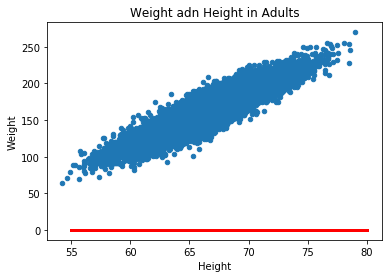

In [6]:
def myLinearRegression(x, w=0, b=0):
    return x * w + b
x = np.linspace(55,80,100)
yhat = myLinearRegression(x,w=0,b=0)
df.plot(kind='scatter',x='Height', y='Weight', title='Weight adn Height in Adults')
plt.plot(x,yhat,color='red', linewidth=3);

In [7]:
def mean_squared_error(y_true,y_pred):
    s = (y_true - y_pred) ** 2
    return s.mean()

In [8]:
X = df['Height'].values

In [9]:
X

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [10]:
y_true = df['Weight'].values

In [11]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [39]:
y_pred = myLinearRegression(X,w=7.774852,b=-350.64633) #initially x = 2 and b =30. Changed values from Keras model

In [40]:
y_pred

array([223.50329795, 184.12279423, 225.54877113, ..., 145.917857  ,
       186.08469327, 130.96101396])

In [41]:
mean_squared_error(y_true,y_pred)

164.64054894037724

In [42]:
#faster results #Cost Function

In [43]:
mean_squared_error(y_true,y_pred.ravel())

164.64054894037724

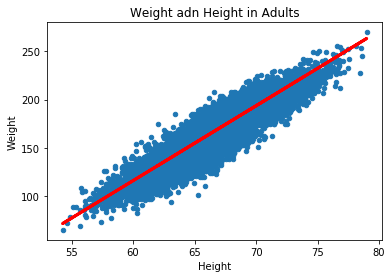

In [44]:
df.plot(kind='scatter',x='Height', y='Weight', title='Weight adn Height in Adults')
plt.plot(X,y_pred,color='red', linewidth=3);

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [91]:
model = Sequential()

In [92]:
model.add(Dense(1,input_shape=(1,)))

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(Adam(lr=.7),'mean_squared_error')

In [103]:
model.fit(X,y_true, epochs=90)

Epoch 1/90
10000/10000 [==============================] - 0s 33us/step - loss: 183.3298
Epoch 2/90
10000/10000 [==============================] - 0s 17us/step - loss: 171.7687
Epoch 3/90
10000/10000 [==============================] - 0s 19us/step - loss: 171.6701
Epoch 4/90
10000/10000 [==============================] - 0s 18us/step - loss: 183.0985
Epoch 5/90
10000/10000 [==============================] - 0s 17us/step - loss: 179.6339
Epoch 6/90
10000/10000 [==============================] - 0s 18us/step - loss: 171.4456
Epoch 7/90
10000/10000 [==============================] - 0s 18us/step - loss: 169.5785
Epoch 8/90
10000/10000 [==============================] - 0s 18us/step - loss: 176.9016
Epoch 9/90
10000/10000 [==============================] - 0s 18us/step - loss: 166.9112
Epoch 10/90
10000/10000 [==============================] - 0s 17us/step - loss: 177.8615
Epoch 11/90
10000/10000 [==============================] - 0s 17us/step - loss: 167.5652
Epoch 12/90
10000/10000 [=====

In [104]:
y_pred = model.predict(X)

In [105]:
y_pred

array([[221.02264],
       [181.8056 ],
       [223.05963],
       ...,
       [143.75931],
       [183.75934],
       [128.86453]], dtype=float32)

In [106]:
W, B = model.get_weights()

In [107]:
W

array([[7.7425737]], dtype=float32)

In [108]:
B

array([-350.74335], dtype=float32)

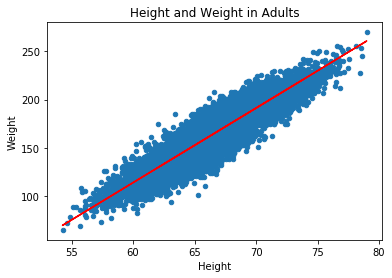

In [109]:
df.plot(kind='scatter', x='Height', y='Weight', title='Height and Weight in Adults')
plt.plot(X,y_pred, color='red')